In [32]:
%matplotlib inline
### Standard imports
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
### Settings
hf.DefaultSetup()

def PrintKeys(fileName):
    for k in uproot.open(fileName).allkeys():
        print(k)
        
def OpenRoot(fileName,tree):
    rTree = uproot.open(fileName)[tree]
    df = rTree.pandas.df(['*'],flatten=False,namedecode='utf-8')
    return df

# Special trick for string columns
def decodeList(l):
    return [x.decode(encoding='UTF-8') for x in l]

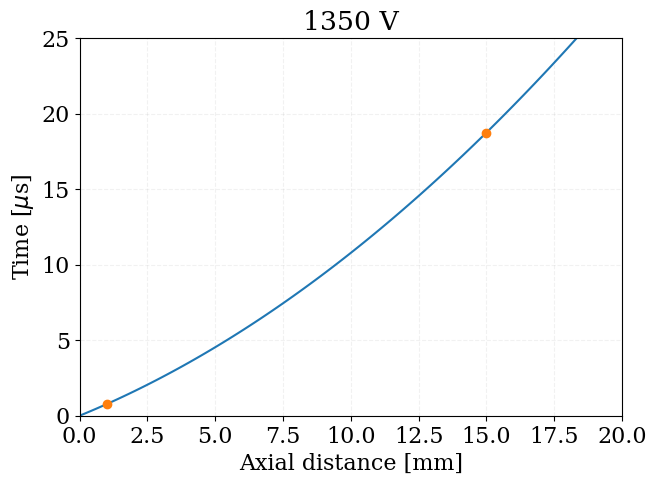

In [71]:
def eSpeed(dist):
    from scipy import interpolate

    xs = [0,1,15]
    ys = [0,1/1.3,15/0.8]
    f = interpolate.interp1d(xs, ys, kind='quadratic', fill_value='extrapolate')
    return f(dist)

xrange = np.linspace(0,20,100)
plt.figure(figsize=(7,5),facecolor='white',dpi=100)
plt.plot(xrange,f(xrange))
plt.plot(xs[1:],ys[1:],ls='',marker='o')
plt.grid(ls='--',color='C7',alpha=0.1)
plt.title("1350 V")
plt.xlabel("Axial distance [mm]")
plt.ylabel(r"Time [$\mu$s]")
plt.xlim(0,20)
plt.ylim(0,25)
plt.show()